In [1]:
import copy
import pprint
import itertools
import hashlib
import networkx as nx

from collections import Counter

In [3]:
import copy
import pprint
import itertools
import hashlib
import networkx as nx

from collections import Counter

def base_WL(G_, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
    if verbose:
        print('-----------------------------------')
        print('Starting the execution for the graph')
    G, n = n_set(G_)
    colors = initial_colors_func(n)

    old_colors = copy.deepcopy(colors)
    
    if verbose:
        print(f'Initial Color hashes: \n {colors} \n')

    subsets_at_iteration = []  # Initialize a list to store subsets at each iteration

    for i in range(len(n)):
        current_iteration_subsets = {}  # Store subsets for the current iteration
        for node in n:
            neigh_colors = "".join([colors[i][0] for i in find_neighbors_func(G, n, node)])
            
            colors[node].extend([neigh_colors])
            colors[node].sort()

            # Add nodes with the same color to the current subset
            color_hash = hashlib.sha224("".join(colors[node]).encode('utf-8')).hexdigest()
            if color_hash in current_iteration_subsets:
                current_iteration_subsets[color_hash].append(node)
            else:
                current_iteration_subsets[color_hash] = [node]

        subsets_at_iteration.append(current_iteration_subsets)  # Add subsets for the current iteration to the list

        # Update with the hash
        if verbose:
            print(f'Colors before hashes at iteration {i}: {colors} \n')
        colors = {i: [hashlib.sha224("".join(colors[i]).encode('utf-8')).hexdigest()] for i in colors}
                
        if verbose:
            print(f'Colors hashes at iteration {i}: \n {colors} \n')
            print(f'Histogram: \n {sorted(Counter([item for sublist in colors.values() for item in sublist]).items())} \n')
        
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        
        old_colors = copy.deepcopy(colors)

    canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    if verbose:
        print(f'Canonical Form Found: \n {canonical_form} \n')

    return subsets_at_iteration  # Return the list of subsets at each iteration

def kWL(G, k, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        V = list(G.nodes())
        V_k = [comb for comb in itertools.combinations(V, k)]
        return G, V_k

    def set_initial_colors(n):
        return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}

    def find_neighbors(G, V_k, node):
        print([n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1])
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1]

    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)


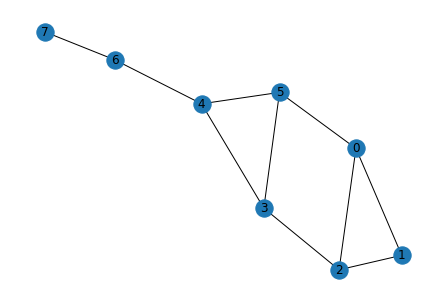

In [5]:
G = nx.Graph()
G_edge_list = [(0, 1), (1, 2), (2, 0),(2,3),(3,4),(4,5),(5,3),(0,5),(4,6),(6,7)]
G.add_edges_from(G_edge_list)

nx.draw(G,with_labels=True)

In [9]:
k = 3
subsets_at_iteration = kWL(G, k, verbose=True)



-----------------------------------
Starting the execution for the graph
Initial Color hashes: 
 {(0, 1, 2): ['49df0a38eab038008d37258af936ca8cd9b18a0162cdbdaba3974eff'], (0, 1, 3): ['8be3883acbf8c1a2cf8ea36d1de238ea57f59d79cccf99b2b890e25a'], (0, 1, 4): ['19664a6acf8377dc474aa6b3a776d3cedb31a1083fd638f91d8f3650'], (0, 1, 5): ['3f52cc93c9f64b6a658e69b32e724e7c03b53c6fe676d0992e1cbe91'], (0, 1, 6): ['22ce27c0e944630dfd14b0215e416e4a0af3c71ea73b6dffb2abdffa'], (0, 1, 7): ['f146fff0203377f735eb5bb1f1c3dbbc897a4b71eb16bf819ba2c587'], (0, 2, 3): ['ec4759a6e9f5174668c5b99182bc98e6053f569805d7dc957fb88900'], (0, 2, 4): ['05d32f4517e09c6d0a8b38c650d0da2af978875a1ecf13b43a8a1424'], (0, 2, 5): ['d3dc33d4835b1ddde5c912e0ffa5c084ebbd06579eacda5d5864115b'], (0, 2, 6): ['0f53e78d15d9ad12cc2c887484ce5a2cf8a483c243ea17489e807af6'], (0, 2, 7): ['bd6ad40743cc721863e744ad13a9857dd95f4e7290569bd0201e5c12'], (0, 3, 4): ['845911bf3b4728bfa1c6126b0c7bd7b4e8e032c7ddc27e15b5788f3c'], (0, 3, 5): ['24753e03f3e3b

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[(0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 6), (3, 4, 7), (3, 5, 6), (3, 5, 7), (4, 5, 6), (4, 5, 7)]
[(0, 3, 4), (0, 3, 6), (0, 4, 6), (1, 3, 4), (1, 3, 6), (1, 4, 6), (2, 3, 4), (2, 3, 6), (2, 4, 6), (3, 4, 5), (3, 4, 7), (3, 5, 6), (3, 6, 7), (4, 5, 6), (4, 6, 7)]
[(0, 3, 4), (0, 3, 7), (0, 4, 7), (1, 3, 4), (1, 3, 7), (1, 4, 7), (2, 3, 4), (2, 3, 7), (2, 4, 7), (3, 4, 5), (3, 4, 6), (3, 5, 7), (3, 6, 7), (4, 5, 7), (4, 6, 7)]
[(0, 3, 5), (0, 3, 6), (0, 5, 6), (1, 3, 5), (1, 3, 6), (1, 5, 6), (2, 3, 5), (2, 3, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 7), (3, 6, 7), (4, 5, 6), (5, 6, 7)]
[(0, 3, 5), (0, 3, 7), (0, 5, 7), (1, 3, 5), (1, 3, 7), (1, 5, 7), (2, 3, 5), (2, 3, 7), (2, 5, 7), (3, 4, 5), (3, 4, 7), (3, 5, 6), (3, 6, 7), (4, 5, 7), (5, 6, 7)]
[(0, 3, 6), (0, 3, 7), (0, 6, 7), (1, 3, 6), (1, 3, 7), (1, 6, 7), (2, 3, 6), (2, 3, 7), (2, 6, 7), (3, 4, 6), (3, 4, 7), (3, 5, 6), (3, 5, 7), (4, 6, 7), (5, 6, 7)]
[(0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Colors hashes at iteration 1: 
 {(0, 1, 2): ['540b44ad096585d4057f4edb91c0f3f8c0c9103f578f60cd39712f5a'], (0, 1, 3): ['4ff968aa658611a3d4c7d12168e296d1d4cea35119fbe99193f663b9'], (0, 1, 4): ['c17f23f4e017dd2db773d91da61d027a5a2fb2bec3d8f81e7e4be893'], (0, 1, 5): ['d8e575d9261faa837f81be94f8b143fc73c99f60665713348cdcfc6b'], (0, 1, 6): ['928515c9079342de551cc2cc36c4cc104b5d0e0c844a515260b7e4d4'], (0, 1, 7): ['e9a6b622daa3cb51575985b304c743af188ef38fcbcf2e057beb7fae'], (0, 2, 3): ['cf0fbc43903944b99d6d01bb90348bf8502be156934937efecba0deb'], (0, 2, 4): ['d0c6cda6e39fecfa398c1b32fc1f836cde7d27347072b0d640c21dbb'], (0, 2, 5): ['4ad5325f64891d386f7be5bb1cc3f840b2e07fc54cd90499677860b3'], (0, 2, 6): ['6a2767b24ebb5e33141a2536b900468e7bf1d7951dae2a800658678d'], (0, 2, 7): ['a658bddd6f9f05234932e56da9906564cbac954df5ec63ce1b0b9097'], (0, 3, 4): ['80b28fb63bf32b6957a5980f470a5f8bbaead32af3cf6ab3b3ed7cf4'], (0, 3, 5): ['7ca4303000fcb45963e78aa53d31c8fc7fb8ce63588eac8195c22294'], (0, 3, 6): ['659b0

In [10]:
subsets_at_iteration

[{'cb70265561ae80c1d26486990fd89c85dd1f2814f910b5ede9292ab1': [(0, 1, 2)],
  '28dfc80dc310aa1931ded4efdd442c6094fa08efb591cdd342f9b4d4': [(0, 1, 3)],
  '274f0612f9fcaa27daa30a3738e6dbdd38a7349891eff10809fc58a7': [(0, 1, 4)],
  '1164f2754c8e0f89a6031bf1579984694b9fbdf485b3d42a4299b737': [(0, 1, 5)],
  'dcf03c4183079f29b3b50f3f495d7a72c7a97402baf2dacc0d6af9c5': [(0, 1, 6)],
  'f8095f722998f80e2e183f44ed6ff3c9152710fcf86ee4e6a2aeae67': [(0, 1, 7)],
  'aded81472d354e04525bfc00442d66f086d9934dc2f293f6780e2281': [(0, 2, 3)],
  '379f6ae47c16b8262e9b32c7e3ebdc8ebdd164c4d8522d2892957820': [(0, 2, 4)],
  '23b2c7b5687abf76d83476ac5ed1e7466e4712a6c5271e3705b6a8b6': [(0, 2, 5)],
  'daaa857ef165ad515ebea9bf2cea028f97d15f93c24923c26fd055de': [(0, 2, 6)],
  '11ed132df90a9ad3422055f68e6f1719e14475d5b709ded25388a7f8': [(0, 2, 7)],
  '44555bf591dbc9747ac52ac83a78d5f24832ddff05d0d8669e89cab6': [(0, 3, 4)],
  '0befadf066919f4e0ecce0607d5faa2cf17ab4ef4ba86dbbd190534d': [(0, 3, 5)],
  '9432b20d86d18791dd55f7